# EDA - sklearn load_digits (MINST)

## Problem definition

This is a **supervised multi-class classification problem**.

- Input: 8×8 grayscale image of a handwritten digit
- Output: one label in range from 0 to 10
- Number of classes : 10

## This notebook exist because:
Before training a model, we must understand the dataset:
- what the input looks like (shape, value range)
- what the labels are (classes 0–9)
- whether the dataset is balanced
- how the images look (visual sanity check)

## What we will do
1. Load the dataset with `load_digits()`
2. Inspect shapes and pixel value range
3. Check class distribution (counts per digit)
4. Plot a grid of example images
5. Decide the preprocessing used later for training:
   - flatten 8×8 → 64 features
   - normalize pixels: `x_norm = x_raw / 16.0` (raw pixels are in [0, 16])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()

# X = flattened images (n_sample ,64)
# y = labels (n_sample)
# images = original images (8x8)

X = digits.data
images = digits.images
y = digits.target

print("X shape (flattened):", X.shape)
print("images shape:", images.shape)
print("y shape:", y.shape)

print("Classes:", np.unique(y))
print("Pixel value range (min, max):", X.min(), X.max())



X shape (flattened): (1797, 64)
images shape: (1797, 8, 8)
y shape: (1797,)
Classes: [0 1 2 3 4 5 6 7 8 9]
Pixel value range (min, max): 0.0 16.0


## Inspecting data shape and pixel value range

- How many samples do we have?
- What is the input shape?
- What is the pixel value range?
- Are pixel values already normalized?

In [3]:
# Number of samples
n_samples = X.shape[0]

# Input dimension (flattened)
input_dim = X.shape[1]

print("Number of samples:", n_samples)
print("Input dimension (flattened features):", input_dim)

print("Original image shape:", images[0].shape)

# Pixel statistics
print("Pixel min:", X.min())
print("Pixel max:", X.max())
print("Pixel mean:", X.mean())
print("Pixel std:", X.std())

Number of samples: 1797
Input dimension (flattened features): 64
Original image shape: (8, 8)
Pixel min: 0.0
Pixel max: 16.0
Pixel mean: 4.884164579855314
Pixel std: 6.016787548672236


### Pixel value distribution

We plot a histogram of all pixel values in the dataset.
This helps us understand:

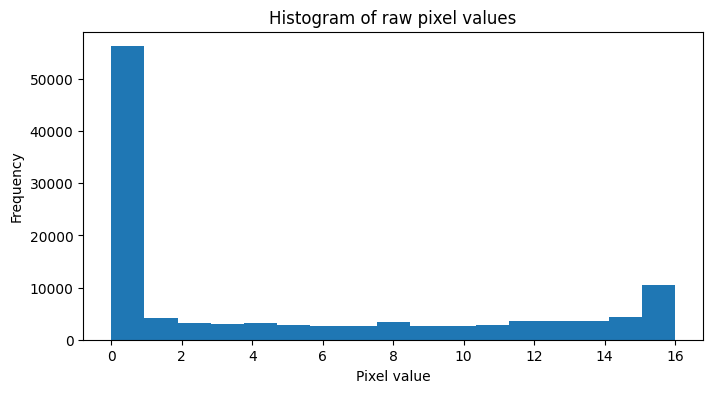

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(X.ravel(), bins=17)  
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.title("Histogram of raw pixel values")
plt.show()

## Visual inspection of the dataset

We visually inspect some images.
This helps us answer:

- Do the images actually look like digits?
- Are they centered?
- Are they very noisy?
- Do different classes look distinguishable?

We will plot a small grid of example images with their labels.

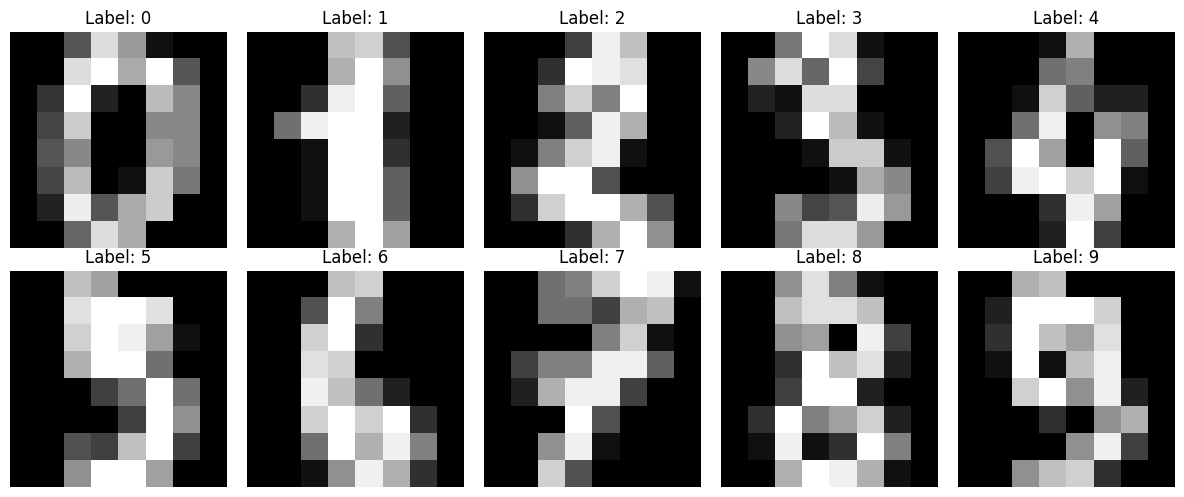

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax, i in zip(axes.ravel(), range(10)):
    ax.imshow(images[i], cmap="gray", interpolation="nearest")
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Samples per class

We now visualize multiple examples for each digit (0–9).
This helps us understand:

- intra-class variability
- how different writing styles look

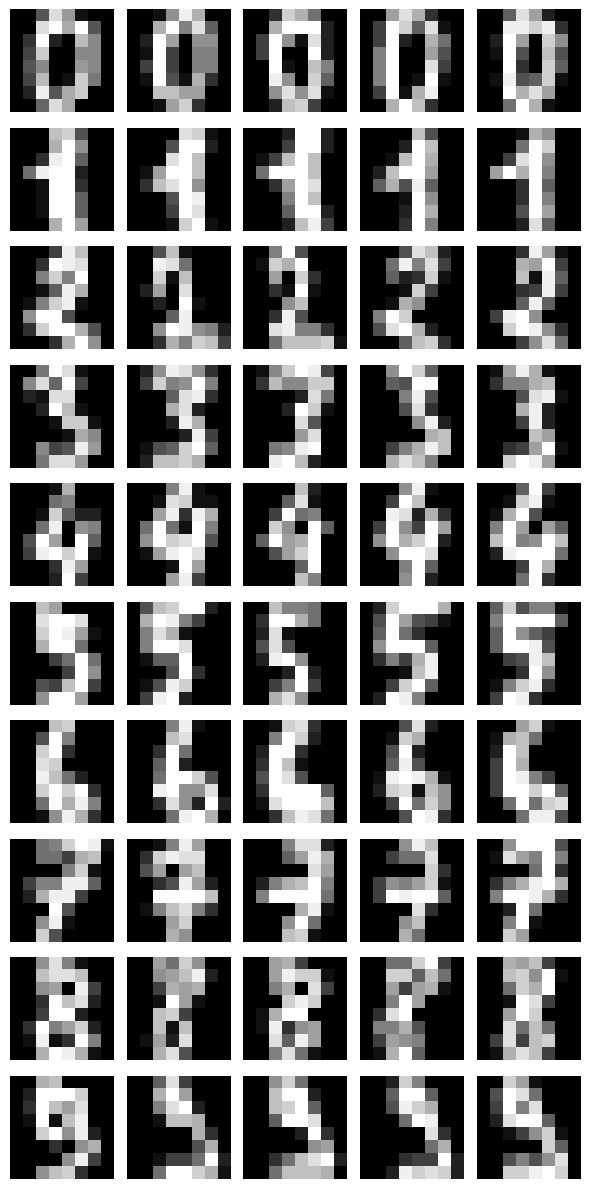

In [7]:
fig, axes = plt.subplots(10, 5, figsize=(6, 12))

for digit in range(10):
    idxs = np.where(y == digit)[0][:5]  # first 5 samples of that class
    
    for col, idx in enumerate(idxs):
        ax = axes[digit, col]
        ax.imshow(images[idx], cmap="gray", interpolation="nearest")
        ax.axis("off")
        
        if col == 0:
            ax.set_ylabel(f"{digit}", rotation=0, labelpad=15, fontsize=12)

plt.tight_layout()
plt.show()

### Observations about image resolution

The images may appear blurry or pixelated.

This is expected because:

- Each image has a very low resolution: **8×8 pixels (64 total pixels)**.
- When plotted on a larger figure, each pixel becomes visually large.
- There is no fine-grained detail compared to higher resolution datasets (e.g. 28×28 MNIST).

Despite the low resolution, the digit shapes are still distinguishable.
This makes the task non-trivial but still solvable with a small neural network.

## EDA Conclusion

From our exploration we can conclude:

- The dataset contains **1797 samples**.
- Each sample is an **8×8 grayscale image**.
- The flattened input representation has **64 features**.
- Pixel values are in the range **[0, 16]**.
- The dataset is relatively balanced across the 10 classes.
- Despite the low resolution, digit shapes are distinguishable.

### Problem type

This is a **supervised multi-class classification problem** with:
- 10 classes (digits 0–9)
- Input dimension: 64
- Output dimension: 10


## Preprocessing decisions (for training)

To ensure stable training, we define the following preprocessing pipeline:

1. Flatten images => already provided as 64 features.
2. Normalize pixel values: we will rescale from [0, 16] to [0, 1]
3. Use stratified train/test split to preserve class balance.

These decisions will be implemented in the training notebook and later in the production pipeline (`src/model/train.py`).